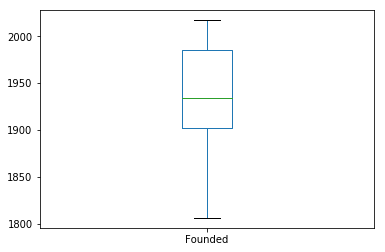

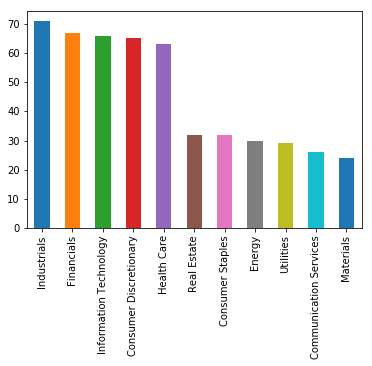

Index(['Symbol', 'Security', 'SEC filings', 'GICS Sector', 'GICS Sub Industry',
       'Location', 'Date first added[3][4]', 'CIK', 'Founded', 'Unnamed: 9'],
      dtype='object')

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Open Website and get only the table on the page with the relevant data. In this hardcoded case 

def get_wikipedia_html(url):
    return urllib.request.urlopen(url).read().decode("utf-8") # TODO exceptions

whtml = get_wikipedia_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S.26P_500_Component_Stocks")

# first table of the HTML (there may be more than one!)
# header=0 means that the first row is used as a header 
df = pd.read_html(whtml, header=0)[0] 

plt.figure()
pd.to_numeric(df["Founded"], errors="coerce").plot.box()
plt.show()

plt.figure()
df["GICS Sector"].value_counts().plot.bar() # or pie()
plt.show()

#df, 
df.columns




In [2]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if isinstance(val, str):
        color = ''
    else:
        color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

s = df.style.applymap(color_negative_red)
#s

In [3]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    s1 = pd.to_numeric(s, errors='coerce', downcast='float') #s.astype(float) #.where(isinstance(s, str), 0)
    is_max = s1 == s1.max()
    return ['background-color: yellow' if v else '' for v in is_max]

#df.style.apply(highlight_max)

In [4]:
df.style.highlight_null(null_color='red')

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Location,Date first added[3][4],CIK,Founded,Unnamed: 9
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",nan,66740,1902,nan
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888,nan
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),nan
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981,nan
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,nan
5,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008,nan
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982,nan
7,AMD,Advanced Micro Devices Inc,reports,Information Technology,Semiconductors,"Sunnyvale, California",2017-03-20,2488,1969,nan
8,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449,1932,nan
9,AES,AES Corp,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981,nan


In [5]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s2 = df.style.background_gradient(cmap=cm)
s2

/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Location,Date first added[3][4],CIK,Founded,Unnamed: 9
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",nan,66740,1902,nan
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888,nan
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),nan
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981,nan
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,nan
5,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008,nan
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982,nan
7,AMD,Advanced Micro Devices Inc,reports,Information Technology,Semiconductors,"Sunnyvale, California",2017-03-20,2488,1969,nan
8,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449,1932,nan
9,AES,AES Corp,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981,nan


In [6]:
# failure
#h = get_wikipedia_html("https://www.lemonde.fr/campus/article/2018/10/05/concours-de-professeur-des-ecoles-quelles-academies-selectionnent-le-plus_5364985_4401467.html")
#df_h = pd.read_html(h)

In [7]:
from ipywidgets import widgets
@widgets.interact
def f(h_neg=(0, 359, 1), h_pos=(0, 359), s=(0., 99.9), l=(0., 99.9)):
    return df.style.background_gradient(
        cmap=sns.palettes.diverging_palette(h_neg=h_neg, h_pos=h_pos, s=s, l=l,
                                            as_cmap=True)
    )


interactive(children=(IntSlider(value=179, description='h_neg', max=359), IntSlider(value=179, description='h_…

In [8]:
df[df['Location'] == 'St. Paul, Minnesota']
df # seems need to restart the interact widgets

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Location,Date first added[3][4],CIK,Founded,Unnamed: 9
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902,NaN
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888,NaN
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),NaN
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981,NaN
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,NaN
5,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008,NaN
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982,NaN
7,AMD,Advanced Micro Devices Inc,reports,Information Technology,Semiconductors,"Sunnyvale, California",2017-03-20,2488,1969,NaN
8,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449,1932,NaN
9,AES,AES Corp,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981,NaN


In [9]:
items = ['All'] + sorted(df['Location'].unique().tolist())
 
@widgets.interact
def view(x=items):
    if x=='All': return df
    return df[df['Location']==x]

interactive(children=(Dropdown(description='x', options=('All', 'Akron, Ohio', 'Allentown, Pennsylvania', 'Ams…

In [10]:
from selenium import webdriver
import time
import warnings


# screenshoting support is a mess (see my tries with timeout/waiting times)
# PhantomJS has the best support (it takes a full screenshot!) but is deprecated
# firefox and chrome are not really consistent each other and take only the very top of the page
def takeScreenshot(url, outputfilename, waiter=None):
    #driver = webdriver.PhantomJS()
    #warnings.filterwarnings("ignore") # dangerous, but yea PhantomJS is deprecated
    
    #ptions = webdriver.FirefoxOptions()
    #options.headless = True

    #driver = webdriver.PhantomJS() #
    driver = webdriver.PhantomJS() # Firefox() 
    #driver = Chrome(options=options)
    #driver.set_page_load_timeout(10)
    #driver.set_script_timeout(10)
    #driver.maximize_window()
    # driver.set_window_size(1024, 768) # set the window size that you need 
    #driver.implicitly_wait(10) # seconds 
    driver.get(url)
    if waiter is not None:
        time.sleep(waiter)
    driver.save_screenshot(outputfilename) # OUTPUT_FOLDER + url + 
    driver.quit()
    

    
def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])
    
def sanitize_filename(astr):
    return astr.rstrip() # .strip()

OUTPUT_FOLDER="output/"

# if serialize is True, we serialize into HTML and CSV (already time-consuming) 
# and we also take a screenshot of the original Wikipedia page!
def extract_tables_from_pcmlist(serialize=True):
    # hardcoded
    with open("list_of_PCMs.txt") as f:
        wurls = f.readlines()
        
    BASE_WIKIPEDIA_URL="https://en.wikipedia.org/wiki/"

    cols_stats = ["URL", "nrows", "ncols"]
    df_stats = pd.DataFrame(columns=cols_stats)
  
    for wurl in wurls:    
        print ("Extracting from", wurl)
        try:
            wfurl = BASE_WIKIPEDIA_URL + wurl
            whtml = get_wikipedia_html(wfurl)

            # TODO header=0 means that the first row is used as a header, but it can be different 
            # TODO there are other ways to process the HTML (but pandas facilities sound great!)
            dfs = pd.read_html(whtml, header=0)


            if serialize:
                imgFileName = "./" + OUTPUT_FOLDER + sanitize_filename(wurl) + ".png"
                takeScreenshot(wfurl, imgFileName) 
                
            ntable=1
            for df in dfs:

                if serialize:
                    df.to_csv(OUTPUT_FOLDER + sanitize_filename(wurl) + "-" + str(ntable) + ".csv")
                    #df.to_html(OUTPUT_FOLDER + wurl + "-" + str(ntable) + ".html")   

                   # Set CSS properties for th elements in dataframe
                    th_props = [
                      ('font-size', '16px'),
                      ('text-align', 'center'),
                      ('font-weight', 'bold'),
                      ('color', '#6d6d6d'),
                      ('background-color', '#f7f7f9')
                      ]

                    # Set CSS properties for td elements in dataframe
                    td_props = [
                      ('font-size', '14px')
                      ]

                    # Set table styles
                    styles = [
                        hover(),
                        dict(selector="th", props=th_props),
                        dict(selector="td", props=td_props)
                      ]

                    dhtml = df.style.set_table_styles(styles).hide_index().render()
                    dhtml = dhtml + '<div><h1><a href="' + wfurl + '">' + wurl + '</a></h1></div>'
                    rImgFileName = '.' + imgFileName # relative location of the image 
                    dhtml = dhtml + '<div><p>Screenshot of the original page</p><img src="' + rImgFileName + '" /></div>'

                    with open(OUTPUT_FOLDER + sanitize_filename(wurl) + "-" + str(ntable) + ".html", 'w') as file:
                        file.write(dhtml)
                        
                ntable = ntable + 1

                #print (df.shape)
                vals = [wurl, df.shape[0], df.shape[1]]
                df_stats = df_stats.append(dict(zip(cols_stats, vals)), ignore_index=True)
        except urllib.request.HTTPError: 
            print ("URL is not valid!")
        except UnicodeEncodeError:
            print ("ASCII decoding error")
    return df_stats

df_stats = extract_tables_from_pcmlist(False) # no serialization 


Extracting from Comparison_between_Esperanto_and_Ido

Extracting from Comparison_between_Esperanto_and_Interlingua

Extracting from Comparison_between_Esperanto_and_Novial

Extracting from Comparison_between_Ido_and_Interlingua

Extracting from Comparison_between_Ido_and_Novial

Extracting from Comparison_between_U.S._states_and_countries_by_GDP_(PPP)

Extracting from Comparison_of_ALGOL_68_and_C++

Extracting from Comparison_of_Afrikaans_and_Dutch

Extracting from Comparison_of_Android_e-book_reader_software

Extracting from Comparison_of_Asian_national_space_programs

Extracting from Comparison_of_Axis_&_Allies_games

Extracting from Comparison_of_C_Sharp_and_Visual_Basic_.NET

Extracting from Comparison_of_Chernobyl_and_other_radioactivity_releases

Extracting from Comparison_of_Exchange_ActiveSync_clients

URL is not valid!
Extracting from Comparison_of_Hokkien_writing_systems

Extracting from Comparison_of_Home_Owners'_and_Civic_Associations

Extracting from Comparison_of_IOC,_FIF

Extracting from Comparison_of_popular_optical_data-storage_systems

Extracting from Comparison_of_programming_languages_(strings)

Extracting from Comparison_of_programming_languages_(syntax)

Extracting from Comparison_of_programming_paradigms

Extracting from Comparison_of_radio_systems

Extracting from Comparison_of_real_estate_websites

URL is not valid!
Extracting from Comparison_of_12-13.3_inch_subnotebooks

URL is not valid!
Extracting from Comparison_of_3D_computer_graphics_software

Extracting from Comparison_of_AMD_processors

Extracting from Comparison_of_Adobe_Flex_charts

Extracting from Comparison_of_BitTorrent_sites

Extracting from Comparison_of_instruction_set_architectures

Extracting from Comparison_of_CRM_systems

Extracting from Comparison_of_CalDAV_and_CardDAV_implementations

Extracting from Comparison_of_Canon_EOS_digital_cameras

Extracting from Comparison_of_DEX_software

Extracting from Comparison_of_DOS_operating_systems

Extracting from Comparison_of_Europe

URL is not valid!
Extracting from Comparison_of_feed_aggregators

Extracting from Comparison_of_file_synchronization_software

Extracting from Comparison_of_issue-tracking_systems

Extracting from Comparison_of_mobile_Internet_Relay_Chat_clients

Extracting from Comparison_of_raster-to-vector_conversion_software

Extracting from Comparison_of_802.15.4_radio_modules

Extracting from Comparison_of_AMD_chipsets

Extracting from Comparison_of_Internet_Relay_Chat_daemons

Extracting from Comparison_of_SSH_clients

Extracting from Comparison_of_boot_loaders

Extracting from Comparison_of_command_shells

Extracting from Comparison_of_container_formats

Extracting from Comparison_of_enterprise_bookmarking_platforms

Extracting from Comparison_of_file_systems

Extracting from Comparison_of_layout_engines_(ECMAScript)

Extracting from Comparison_of_pumps

Extracting from Comparison_of_reference_management_software

Extracting from Comparison_of_ADC_software

Extracting from Comparison_of_file_ar

In [11]:
df_stats

from ipywidgets import widgets
@widgets.interact
def fr(nrow_order=[True, False],ncols_order=[True, False]):
    return df_stats.sort_values(by=["nrows", "ncols"],ascending=[nrow_order, ncols_order])
    

interactive(children=(Dropdown(description='nrow_order', options=(True, False), value=True), Dropdown(descript…

In [12]:
df_stats['nrows'].describe()
print(100 * len(df_stats.query("nrows <= 1 | ncols <= 1")) /  len(df_stats), "% of extracted tables are pointless (0 or 1 row or 0 or 1 col)") 

21.462264150943398 % of extracted tables are pointless (0 or 1 row or 0 or 1 col)


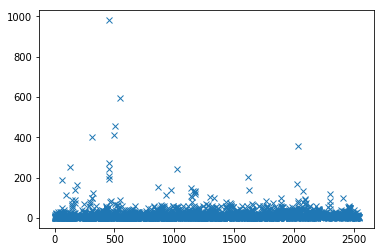

In [13]:
df_stats.query("nrows > 1 | ncols > 1").sort_values(by="nrows", ascending=False)["nrows"].plot(style='x') # .sort_values(by="nrows", ascending=False).
#df_stats.query("nrows > 1 | ncols > 1")["nrows"].plot.hist(alpha=0.3)

In [14]:
df_stats['nrows'].max(), df_stats['ncols'].max()

(981, 1473)

In [15]:
df_stats.loc[df_stats['ncols'].apply(pd.to_numeric, errors = 'coerce').idxmax()]['URL'] # TODO: troubles with argmax

'Comparison_between_U.S._states_and_countries_by_GDP_(nominal)\n'

In [16]:
import os 
import pandas as pd

OUTPUT_FOLDER="output/"

#### procedure for analyzing CSV files extracted from Wikipedia (post-process)
### we assume there are CSV files in OUTPUT_FOLDER

flatten = lambda l: [item for sublist in l for item in sublist]
all_columns = [] 
all_vals = []
cols_stats = ["URL", "nrows", "ncols"]
df_stats = pd.DataFrame(columns=cols_stats)
for filename in os.listdir(OUTPUT_FOLDER):
    if filename.endswith(".csv"): 
        df = pd.read_csv(OUTPUT_FOLDER + filename)
        nrow = df.shape[0]
        ncol = df.shape[1]
        vals = [filename, df.shape[0], df.shape[1]]
        df_stats = df_stats.append(dict(zip(cols_stats, vals)), ignore_index=True)
        if (nrow > 1 and ncol > 1):
            all_columns.append(df.columns.values)
            all_vals.append(df.reset_index(drop=True).values.tolist()) # (we should exclude index) # index.values)
    else:
        continue

cols = flatten(all_columns)
vals = flatten(flatten(all_vals))

# "0" is to access to frequency values of value_counts
wordfreq_cols = pd.DataFrame(cols)[0].value_counts() #[(w, cols.count(w)) for w in cols]
wordfreq_vals = pd.DataFrame(vals)[0].value_counts() #[(w, cols.count(w)) for w in rows]



In [17]:
freq_col = pd.DataFrame(wordfreq_cols).rename(columns={0: "frequency"})
freq_col['columnname'] = freq_col.index

freq_vals = pd.DataFrame(wordfreq_vals).rename(columns={0: "frequency"})
freq_vals['columnname'] = freq_vals.index

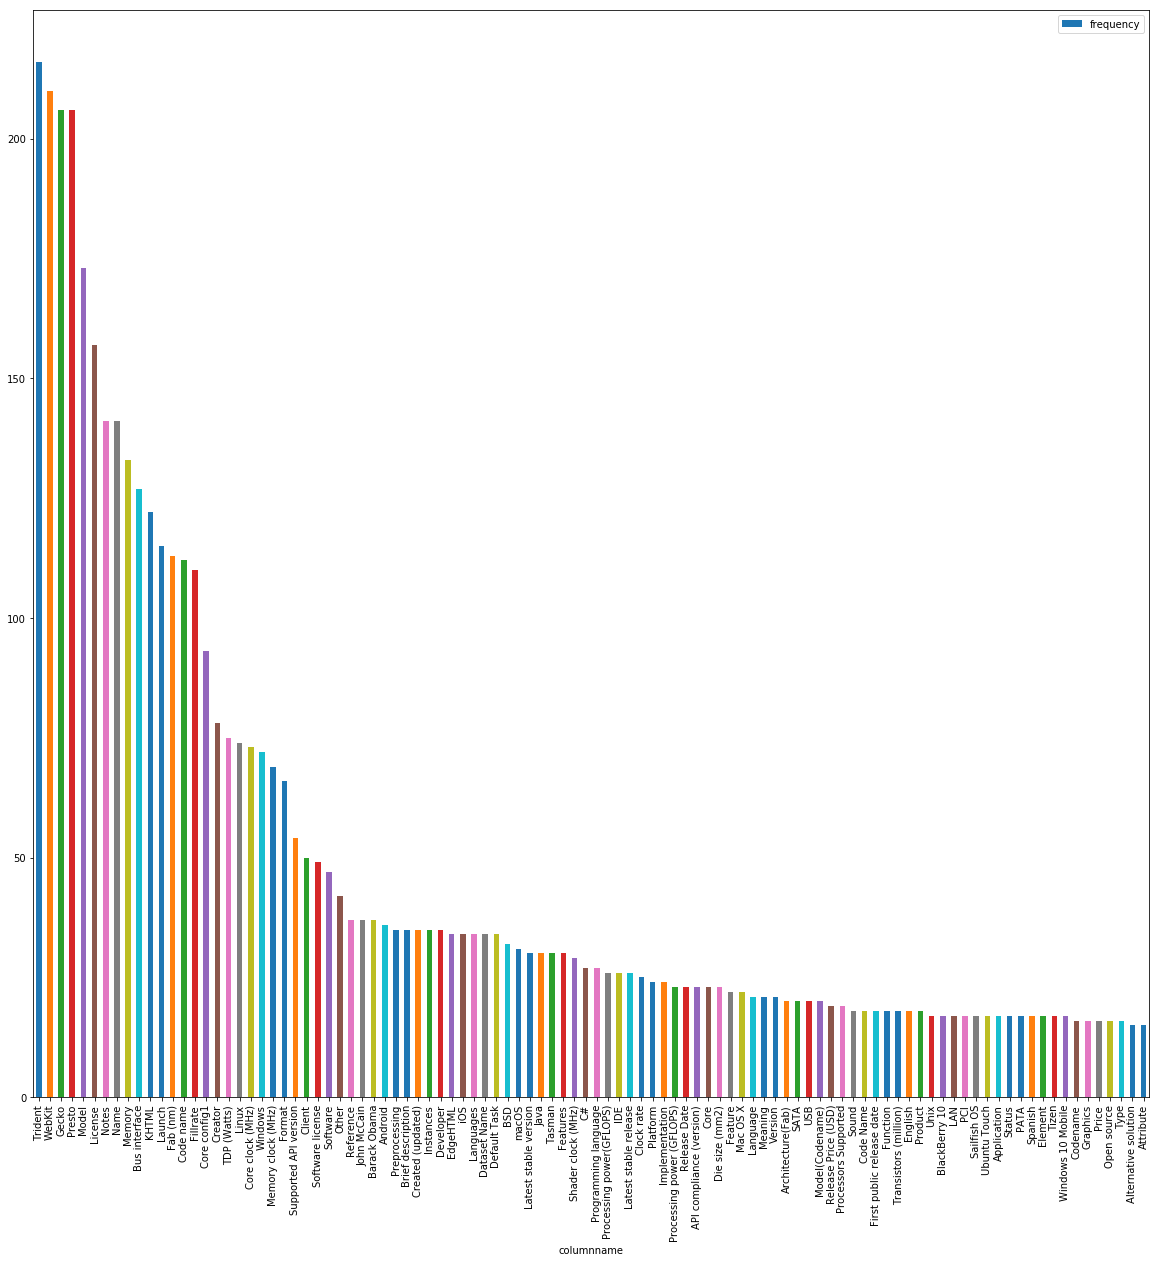

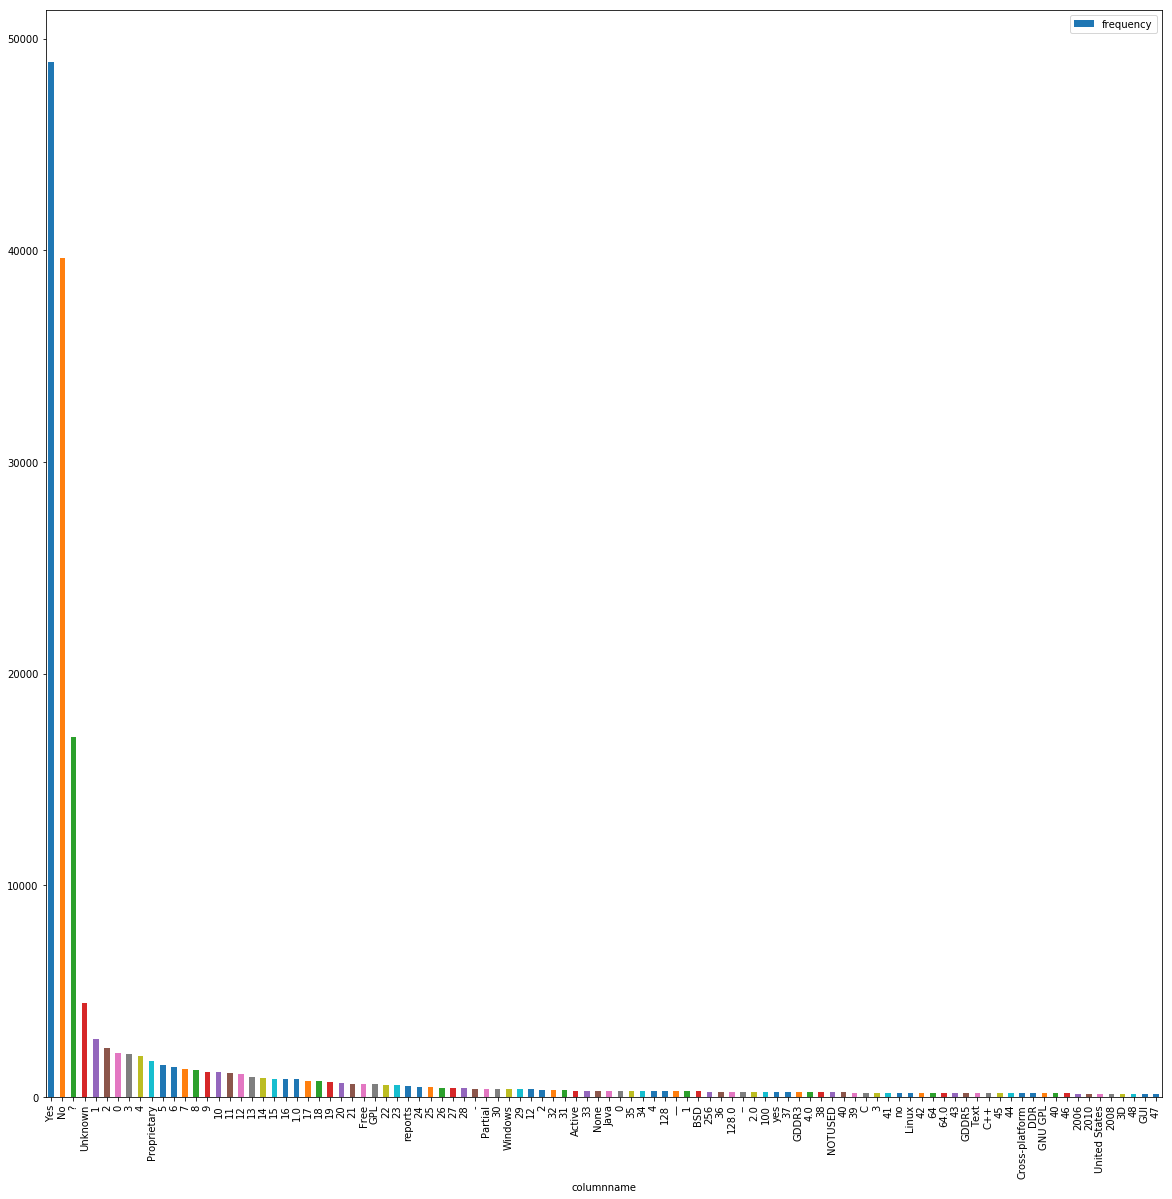

In [18]:
#freq_col = pd.DataFrame(wordfreq_cols, columns=["columnname", "frequency"])
wnoise_freq_col = freq_col[freq_col["columnname"].str.startswith("Unnamed") == False]
#freq_col.sort_values(by="frequency", ascending=False)[:100].plot.bar(x="columnname", y="frequency", figsize=(20, 20))
wnoise_freq_col.sort_values(by="frequency", ascending=False)[:100].plot.bar(x="columnname", y="frequency", figsize=(20, 20))


# wnoise_freq_vals = freq_vals[freq_vals["columnname"].str.startswith("Unnamed") == False]
#freq_rows.sort_values(by="frequency", ascending=False)[:100].plot.bar(x="columnname", y="frequency", figsize=(20, 20))
freq_vals.sort_values(by="frequency", ascending=False)[:100].plot.bar(x="columnname", y="frequency", figsize=(20, 20))



In [19]:
df_stats.sort_values(by="nrows", ascending=False)[:10]

,URL,nrows,ncols
2507,Comparison_between_U.S._states_and_countries_b...,981,1474
914,Comparison_of_Malaysian_and_Indonesian-1.csv,593,5
998,companies.csv,505,11
1690,Comparison_of_Dewey_and_Library_of_Congress_su...,456,4
1720,Comparison_of_Chinese_romanization_systems-2.csv,413,12
83,Comparison_of_layout_engines_(Cascading_Style_...,402,9
2281,Comparison_of_layout_engines_(Document_Object_...,359,9
1008,Comparison_between_U.S._states_and_countries_b...,274,5
1711,"Comparison_of_IOC,_FIFA,_and_ISO_3166_country_...",254,7
1238,Comparison_of_graphics_file_formats-1.csv,244,9


In [20]:
OUTPUT_FOLDER="output/"

def get_dataframe_wikipedia(wurl, ntable=1):
    #wfurl = BASE_WIKIPEDIA_URL + wurl
    whtml = get_wikipedia_html(wurl) # get_wikipedia_html(wfurl)
        
    # TODO there may be more than one table
    # TODO header=0 means that the first row is used as a header, but it can be different 
    # TODO there are other ways to process the HTML (but pandas facilities sound great!)
    df = pd.read_html(whtml, header=0)[ntable-1] # flavor="bs4"
    return df

ex = get_dataframe_wikipedia("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S.26P_500_Component_Stocks")
#TableDisplay(ex)
ex.to_csv(OUTPUT_FOLDER + "companies.csv")

In [21]:
from beakerx import *
from beakerx.object import beakerx
TableDisplay(pd.read_csv(OUTPUT_FOLDER + "companies.csv"))

In [22]:
#ex

In [23]:
ex2 = get_dataframe_wikipedia("https://en.wikipedia.org/wiki/Comparison_of_Canon_EOS_digital_cameras")
#ex2

In [24]:
ex3 = get_dataframe_wikipedia("https://en.wikipedia.org/wiki/Comparison_of_file_hosting_services", 4)
#ex3

In [25]:
#ex4 = get_dataframe_wikipedia("https://fr.wikipedia.org/wiki/Jeux_olympiques_d%27%C3%A9t%C3%A9", 3)
#ex4 

In [26]:
ex3.reset_index(drop=True).values.tolist()

[['Amazon Drive[2]',
  'GB 3 mo. free trial,up to 30 TB paid',
  '2 GB upload via Web, 50 GB per file via Drive app and third party clients [3]',
  'Yes',
  'Amazon S3 limits',
  '90 days after subscription expires, data is deleted.',
  'No',
  'Yes',
  'No',
  'No',
  '?',
  '?',
  '5',
  'Free 5GB plan only for China and Brazil.'],
 ['Amazon S3[4]',
  'paid bandwidth,unlimited paid',
  nan,
  'Yes',
  'Amazon S3 limits',
  'None, pay for storage each month',
  'No',
  'REST, SOAP',
  '?',
  'Yes',
  '?',
  '?',
  '0',
  nan],
 ['Baidu Cloud',
  '(6 GB free)[5]',
  '10 GB free,20 GB paid [6]',
  'Yes',
  'None',
  'None',
  'Yes',
  'Yes',
  'No',
  'No',
  'No',
  '?',
  '6',
  'Currently in Chinese only'],
 ['Box[7][8]',
  'free trial,100 GB paid (Starter),Unlimited Business,Unlimited Enterprise[9]',
  '250\xa0MB free Personal,5\xa0GB paid Personal,5 GB Business,5 GB Enterprise[9]',
  'Paid account types only[10]',
  '10\xa0GB/month free,2 TB/month paid[11]',
  'None[citation needed

In [27]:
ex4 = get_dataframe_wikipedia("https://fr.wikipedia.org/wiki/Jeux_olympiques_d%27%C3%A9t%C3%A9", 9)

In [28]:
ex4